In [1]:
import pandas as pd
import os
import numpy as np
import scprep
# import magic
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from pca import pca
DIR = "/Users/cookie/Documents/UNC/790-166/project/coviddataset"#data path


In [2]:
# ward_df healthy_df icu_df
def file_load(path,file_list,patient_number):
  groupdata = np.empty([0, 23], dtype=float)
  length_of_index=list()
  if ".DS_Store" in file_list:
        file_list.remove(".DS_Store")
  for filename in range(0,patient_number,1):
      df = pd.read_csv(path+file_list[filename], sep='\t', encoding='utf-8')
      markers = list(df)[1:]
      df[df[markers] < 0] = 0
      df_fix=np.delete(df.to_numpy(), 0, 1)
      groupdata=np.concatenate((groupdata, df_fix), axis=0)
      length_of_index.append(len(df_fix))
  return groupdata,length_of_index,df.columns

dataHealthy,healthy_length,csv_column=file_load(DIR+'/healthy/',os.listdir(DIR+'/healthy'),6)
# scprep.plot.plot_library_size(dataHealthy, cutoff=100)
dataHealthy = scprep.filter.filter_library_size(dataHealthy, cutoff=100)
print(dataHealthy.shape)
label=[0 for i in range(len(dataHealthy))]


dataWard,ward_length,csv_column=file_load(DIR+'/ward/',os.listdir(DIR+'/ward'),6)
# scprep.plot.plot_library_size(dataWard, cutoff=100)
dataWard = scprep.filter.filter_library_size(dataWard, cutoff=100)
print(dataWard.shape)
sublabel=[1 for i in range(len(dataWard))]
label+=sublabel

dataICU,ICU_length,csv_column=file_load(DIR+'/ICU/',os.listdir(DIR+'/ICU'),6)
# scprep.plot.plot_library_size(dataICU, cutoff=100)
dataICU = scprep.filter.filter_library_size(dataICU, cutoff=100)
print(dataICU.shape)
sublabel=[2 for i in range(len(dataICU))]
csv_column=list(csv_column)
label+=sublabel
csv_column.remove('Unnamed: 0')
print(csv_column)

(179367, 23)
(130858, 23)
(88478, 23)
['FOXP3', 'IL-17a', 'IL-2', 'CD3', 'GATA3', 'CD4', 'CD45RA', 'Tbet', 'IFNg', 'CD8', 'IL-4', 'CD19', 'HLA-DR', 'IL-10', 'CD25', 'PD-1', 'CD40L', 'RORgt', 'CTLA-4', 'CCR7', 'TNFa', 'IL-6', 'CD14']


In [3]:
dataCombine = np.empty([0, 23], dtype=float)
dataCombine=np.concatenate((dataCombine, dataHealthy), axis=0)
dataCombine=np.concatenate((dataCombine, dataWard), axis=0)
dataCombine=np.concatenate((dataCombine, dataICU), axis=0)
dataCombine_df = pd.DataFrame(dataCombine, columns = csv_column)

# dataCombine_df = pd.read_pickle("/Users/cookie/Desktop/gooddata.pkl")
# print(dataCombine_df)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataCombine, label,test_size=0.3, stratify=label,random_state=1)
clf = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='adaptive', learning_rate_init=0.005, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=300).fit(X_train, y_train)
# print(clf.predict_proba(X_test[:1]))
# print( clf.predict(X_test))
print(clf.score(X_test, y_test))

0.8422553109663827


In [5]:
# model = pca(normalize=True)
# out = model.fit_transform(dataCombine, col_labels=dataCombine_df.columns, row_labels=label)

model = pca(normalize=True)
out = model.fit_transform(dataCombine_df)


[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [23] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [20] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [23] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[20]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


['FOXP3', 'IL-17a', 'IL-2', 'CD3', 'GATA3', 'CD4', 'CD45RA', 'Tbet', 'IFNg', 'CD8', 'IL-4', 'CD19', 'HLA-DR', 'IL-10', 'CD25', 'PD-1', 'CD40L', 'RORgt', 'CTLA-4', 'CCR7', 'TNFa', 'IL-6', 'CD14']
(20, 23)


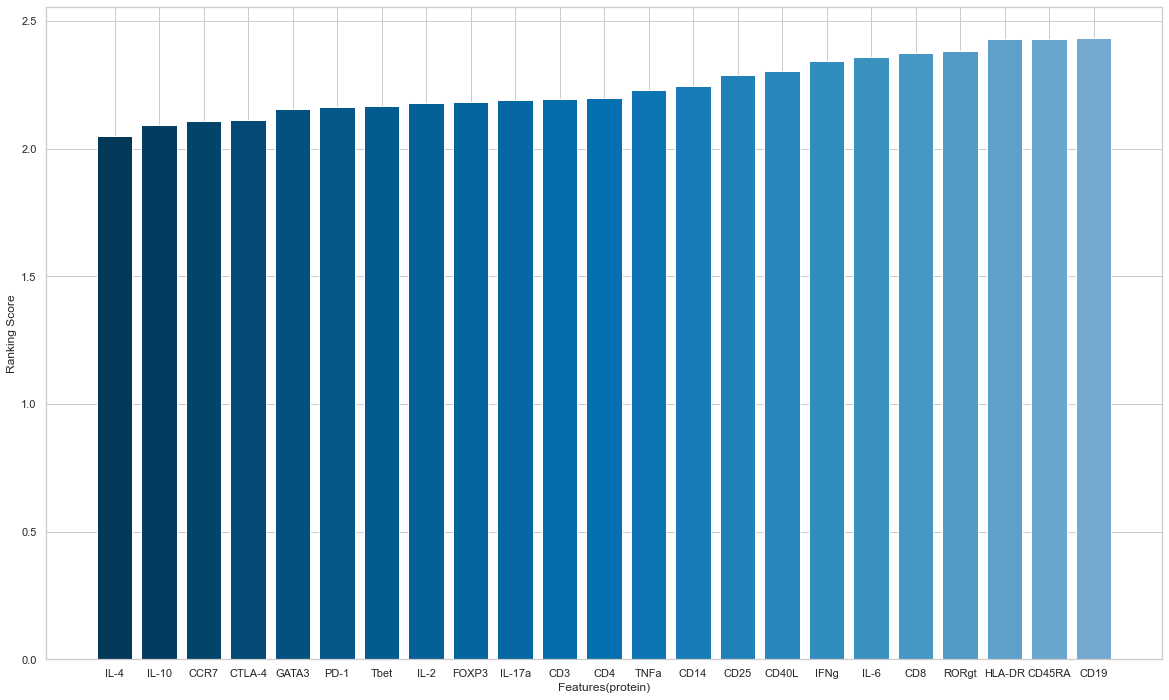

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def multiplyList(myList) :
    countt=0
    result = 0
    for x in myList:
        if x!=23:
            result = result + math.log(x)
        else:
            countt+=1
    result=(result/len(myList))+(math.log(23)*countt/len(myList))
    return result

get_result=model.results['loadings']


dataCombine_df["Label"]=label
features_nam=list(dataCombine_df.columns)
features_nam.remove('Label')
print(features_nam)
rank=np.zeros((len(get_result),23), dtype=int)
for i in range(1,len(get_result)+1,1):
    per_pc=get_result.loc["PC"+str(i)].sort_values(key=lambda x: np.abs(x), ascending=False).index
    # print(per_pc)
    for j in range(0,len(per_pc)):
        store_dix=features_nam.index(per_pc[j])
        rank[i-1][store_dix]=j+1


print(rank.shape)
score_lst=list()
for i in range(0,len(rank[0]),1):
    score_lst.append(multiplyList(rank[:,i]))
sortlst=np.argsort(score_lst)
get_rk=[0 for i in range(0,len(sortlst))]
for i in range(0,len(sortlst)):
    get_rk[sortlst[i]]=i+1
x=[i for i in range(0,23)]
sns.set(rc={'figure.figsize':(20,12)})
sns.set_style("whitegrid")
gcolors = plt.cm.PuBu_r(np.linspace(0, 0.5, len(features_nam)))
plt.bar(x, np.array(score_lst)[np.array(sortlst)], align="center", color=gcolors, tick_label=np.array(features_nam)[np.array(sortlst)])
plt.xlabel('Features(protein)')
plt.ylabel('Ranking Score')
plt.show()

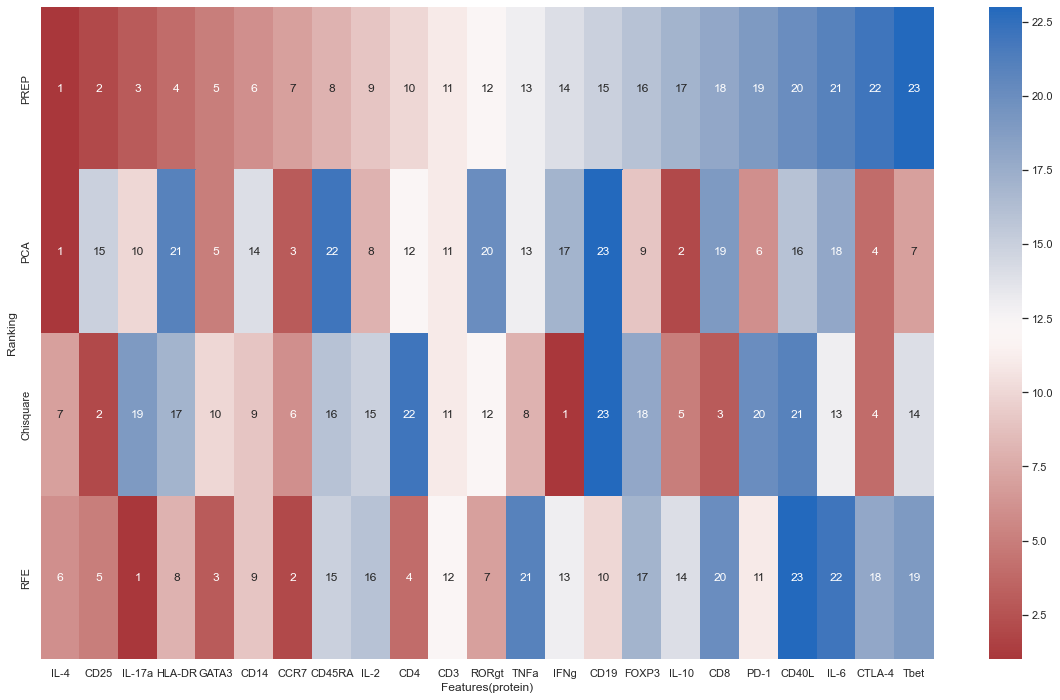

In [7]:
compare_data_rank=[
    [16, 3, 9, 11, 5, 10, 8, 23, 14, 18, 1, 15, 4, 17, 2, 19, 20, 12, 22,7 ,13 ,21 ,6 ]#PREP
    ,[9, 10, 8, 11, 5, 12, 22, 7, 17, 19, 1, 23, 21, 2, 15, 6, 16, 20, 4, 3, 13, 18, 14]#PCA
    ,[18, 19, 15, 11, 10, 22, 16, 14, 1, 3, 7, 23, 17, 5, 2, 20, 21, 12, 4, 6, 8, 13, 9]#ChiSquare
    ,[17, 1, 16, 12, 3, 4, 15, 19, 13, 20, 6, 10, 8, 14, 5, 11, 23, 7, 18, 2, 21, 22,9 ]]#RFE
sortlst=np.argsort(compare_data_rank[0])
df_rk = pd.DataFrame(np.array(compare_data_rank)[:,np.array(sortlst)], columns = np.array(features_nam)[np.array(sortlst)], index = ['PREP','PCA','Chisquare','RFE'])
cmap = sns.cm.vlag_r
g = sns.heatmap(df_rk, annot=True, cmap=cmap)
plt.xlabel('Features(protein)')
plt.ylabel('Ranking')
plt.show()

(10000, 23)


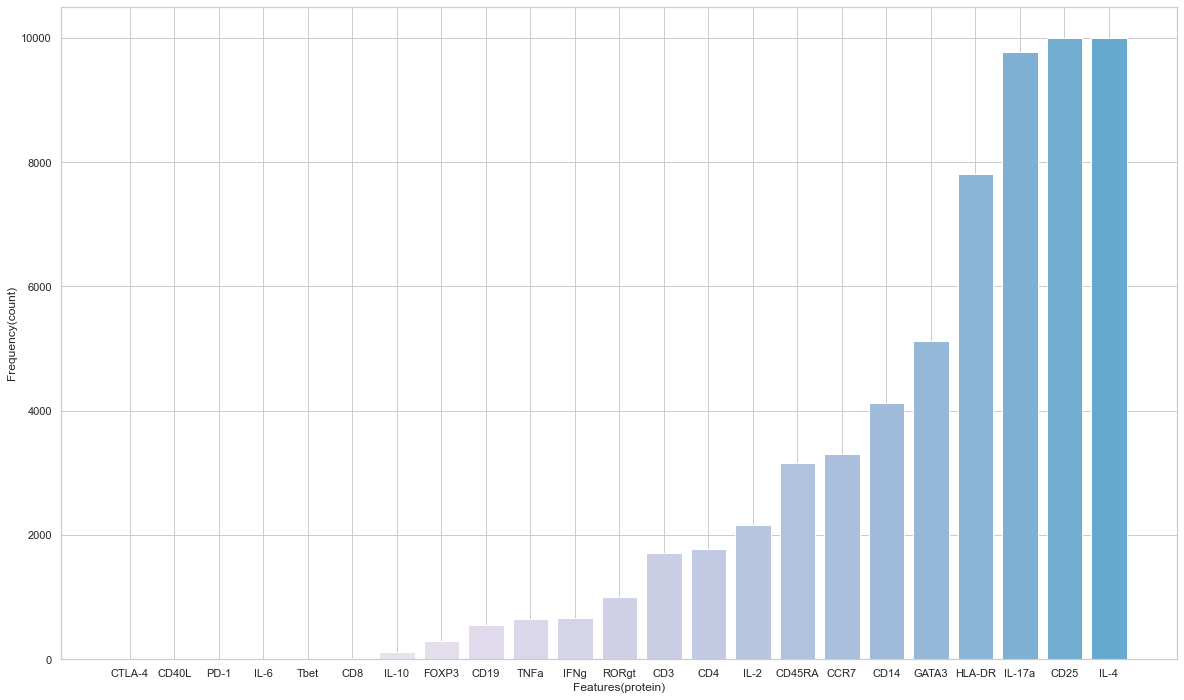

[16, 3, 9, 11, 5, 10, 8, 23, 14, 18, 1, 15, 4, 17, 2, 19, 20, 12, 22, 7, 13, 21, 6]


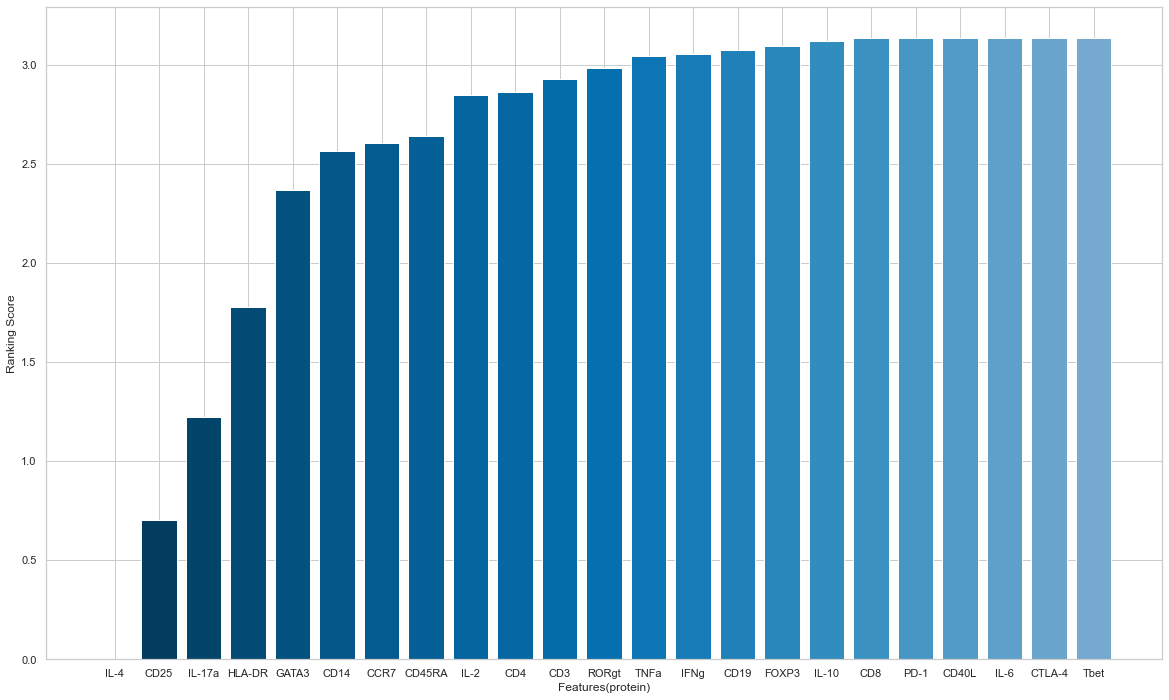

In [8]:
# unpickled_df = pd.read_pickle("./dataCombine_beforeMAGIC_6.pkl") 
# unpickled_df

unpickled_df = pd.read_pickle("trajectories (2).pkl")#ranking trajectory result
get_column=list(dataCombine_df.columns)
get_column.remove('Label')
# print(get_column)

freq=np.zeros((len(unpickled_df),23), dtype=int)
rank= [[23 for i in range(23)] for j in range(len(unpickled_df))]
rank=np.array(rank)
print(rank.shape)
for i in range(0,len(unpickled_df),1):
    for numm in range(0,len(unpickled_df[i])):
        freq[i][unpickled_df[i][numm]]+=1
        rank[i][unpickled_df[i][numm]]=numm+1

remove_lst=list()
for i in range(0,len(freq[0]),1):
    remove_lst.append(sum(freq[:,i]))
sortlst=np.argsort(remove_lst)
x=[i for i in range(0,23)]
colors=["#66c2a5" for i in range(0,23)]
sns.set(rc={'figure.figsize':(20,12)})
sns.set_style("whitegrid")
gcolors = plt.cm.PuBuGn(np.linspace(0, 0.5, len(get_column)))
plt.bar(x, np.array(remove_lst)[np.array(sortlst)], align="center", color=gcolors, tick_label=np.array(get_column)[np.array(sortlst)])
plt.xlabel('Features(protein)')
plt.ylabel('Frequency(count)')
plt.show()

score_lst=list()
for i in range(0,len(rank[0]),1):
    rank_value=multiplyList(rank[:,i])
    score_lst.append(rank_value)
# print(score_lst)
sortlst=np.argsort(score_lst)
x=[i for i in range(0,23)]
get_rk=[0 for i in range(0,len(sortlst))]
for i in range(0,len(sortlst)):
    get_rk[sortlst[i]]=i+1
print(get_rk)
colors=["#66c2a5" for i in range(0,23)]
sns.set(rc={'figure.figsize':(20,12)})
sns.set_style("whitegrid")
gcolors = plt.cm.PuBu_r(np.linspace(0, 0.5, len(get_column)))

plt.bar(x, np.array(score_lst)[np.array(sortlst)], align="center", color=gcolors, tick_label=np.array(get_column)[np.array(sortlst)])
plt.xlabel('Features(protein)')
plt.ylabel('Ranking Score')
plt.show()